<a href="https://colab.research.google.com/github/11doris/jazz-maestro/blob/colab_word_embeddings/chords_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y gensim

Found existing installation: gensim 4.1.2
Uninstalling gensim-4.1.2:
  Successfully uninstalled gensim-4.1.2


In [2]:
pip install gensim

  Using cached gensim-4.1.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)


In [266]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 57 kB/s 
     |████████████████████████████████| 11.3 MB 45.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=e3adc8334f6b8c423e6c7d88936c336be23155ad2fb89d0f6a395b7d73a83e78
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

In [1]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pprint
import pandas as pd
import numpy as np
from gensim.models.phrases import Phrases


In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
print(gensim.__version__)

4.1.2


# Initialization

## Download the Data

Full chords, no repetitions

In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15qjh1wyQ4tdeRDzYMqNwTDBs0KNKsL-K' -O input_seq_norep.txt


--2021-11-11 17:52:56--  https://docs.google.com/uc?export=download&id=15qjh1wyQ4tdeRDzYMqNwTDBs0KNKsL-K
Resolving docs.google.com (docs.google.com)... 142.250.1.113, 142.250.1.101, 142.250.1.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.1.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o984m9j47lkeu2tatk6j3ps297gielr2/1636653150000/14329102864480165501/*/15qjh1wyQ4tdeRDzYMqNwTDBs0KNKsL-K?e=download [following]
--2021-11-11 17:52:56--  https://doc-0g-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o984m9j47lkeu2tatk6j3ps297gielr2/1636653150000/14329102864480165501/*/15qjh1wyQ4tdeRDzYMqNwTDBs0KNKsL-K?e=download
Resolving doc-0g-4c-docs.googleusercontent.com (doc-0g-4c-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-0g-4c-docs.googleusercontent.com (doc-0g-4c-docs

With repetitions, full chords:

In [5]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a' -O input_seq.txt

--2021-11-11 17:52:57--  https://docs.google.com/uc?export=download&id=1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a
Resolving docs.google.com (docs.google.com)... 142.250.1.102, 142.250.1.139, 142.250.1.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.1.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aes5k69idhh8t674m66g99g2dqv8dnuf/1636653150000/14329102864480165501/*/1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a?e=download [following]
--2021-11-11 17:52:57--  https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aes5k69idhh8t674m66g99g2dqv8dnuf/1636653150000/14329102864480165501/*/1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a?e=download
Resolving doc-08-4c-docs.googleusercontent.com (doc-08-4c-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-08-4c-docs.googleusercontent.com (doc-08-4c-docs

Download the file with the meta data from Google Drive:

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Qs_SNXKBCeHOZO4VTwIPLR6OsPzEjk6q' -O input_meta.csv

--2021-11-11 17:52:57--  https://docs.google.com/uc?export=download&id=1Qs_SNXKBCeHOZO4VTwIPLR6OsPzEjk6q
Resolving docs.google.com (docs.google.com)... 142.250.1.138, 142.250.1.100, 142.250.1.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.1.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ngjjpegberngh72tvs103sn298kco877/1636653150000/14329102864480165501/*/1Qs_SNXKBCeHOZO4VTwIPLR6OsPzEjk6q?e=download [following]
--2021-11-11 17:52:59--  https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ngjjpegberngh72tvs103sn298kco877/1636653150000/14329102864480165501/*/1Qs_SNXKBCeHOZO4VTwIPLR6OsPzEjk6q?e=download
Resolving doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs

### Chords Data

Get the chords data for the tunes, full chords:

In [7]:
path_to_file = '/content/input_seq.txt'

with open(path_to_file) as f: 
  lines = f.read().splitlines()

In [8]:
data = [line.split(' ') for line in lines]

In [9]:
with open('/content/input_seq_norep.txt') as f: 
  lines_norep = f.read().splitlines()

Get the full chords, but with subsequent chords removed:

In [10]:
data_norep = [line.split(' ') for line in lines_norep]

In [11]:
def ngrams(tokens, n=2, sep='-'):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]


def list_to_ngrams(data, n=2, sep='-'):
  out = []
  for row in data:
    out.append(ngrams(row, n, sep))

  return out

In [12]:
#data = list_to_ngrams(data, 3)

In [13]:
len(data)

1812

# Build Phrases model

Find common co-occurrences in the tunes as chord bigrams. Add the found bigrams to the end of the tunes data. This is possible since LDA is not aware of any positions of the chords. 

Determine the bigrams from the chords that have subsequent identical chords removed. Then, append these bigrams to the chords data of the tunes including identical subsequent chords. This data will then be used for the LDA model.

In [14]:
"""
Use npmi scoring since it is more accurate but slower, according to the gensim documentation. 
For npmi, the threshold must be between -1 and 1. Manually checked the chord bigrams, and set the threshold to 0.2 
for reasonable bigram.
"""

phrase_model = Phrases(data_norep, 
                       min_count=1, 
                       threshold=0.2, 
                       scoring='npmi')

2021-11-11 17:52:59,538 : INFO : collecting all words and their counts
2021-11-11 17:52:59,542 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2021-11-11 17:52:59,640 : INFO : collected 7367 token types (unigram + bigrams) from a corpus of 72002 words and 1812 sentences
2021-11-11 17:52:59,643 : INFO : merged Phrases<7367 vocab, min_count=1, threshold=0.2, max_vocab_size=40000000>
2021-11-11 17:52:59,646 : INFO : Phrases lifecycle event {'msg': 'built Phrases<7367 vocab, min_count=1, threshold=0.2, max_vocab_size=40000000> in 0.11s', 'datetime': '2021-11-11T17:52:59.646752', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


In [15]:
df_bigram = pd.DataFrame(phrase_model.vocab.items(), columns=['chord', 'count']).sort_values('count', ascending=False)
df_bigram.head(10)

,chord,count
9,G7,8304
27,Dm7,6687
29,Dm7_G7,4618
84,C,4378
0,CM7,4168
23,Am7,3017
102,A7,2874
25,D7,2722
13,C7,2395
82,Em7,2276


In [16]:
# Compute bigrams.
from gensim.models import Phrases

# sanity check
assert(len(data) == len(data_norep))

# find bigrams in the data without subsequent chord repetitions; add the bigrams to the data with chord repetitions.
for idx in range(len(data)):
    for token in phrase_model[data_norep[idx]]:
        if '_' in token:
            # Token is a bigram, add to tune.
            data[idx].append(token)

In [17]:
#for phrase, score in phrase_model.find_phrases(data).items():
#    print(phrase, score)

### Meta Data

In [18]:
meta = pd.read_csv('input_meta.csv', sep='\t')
meta.head(5)

,id,file_name,title,composer,year,year_truncated,tonality,tune_key,tune_mode,structure,num_bars,time_signature,cycle_fifths_order,style,musicbrainz_id,wikidata_id,wikidata_allmusic,wiki_link,wikidata_description,lyricist
0,0,dataset/jazz1350/26-2.xml,26-2,John Coltrane,1960.0,1960.0,F major,F,major,AABA,32.0,4/4,-1.0,Medium Up Swing,eb51f0dd-c9a6-3849-b135-9cfaa7a90396,NaN,NaN,NaN,NaN,NaN
1,1,dataset/jazz1350/500 Miles High.xml,500 Miles High,Chick Corea,1978.0,1978.0,E minor,E,minor,NaN,26.0,4/4,1.0,Bossa Nova,1e03810a-6632-35ee-959b-dfd244be19b5,NaN,NaN,NaN,NaN,Neville Potter
2,2,dataset/jazz1350/502 Blues.xml,502 Blues,Jimmy Rowles,1962.0,1962.0,A minor,A,minor,NaN,32.0,3/4,0.0,Waltz,cff33fd3-7be2-3559-b06a-1d5cee201939,NaN,NaN,NaN,NaN,NaN
3,3,dataset/jazz1350/52nd Street Theme.xml,52nd Street Theme,Thelonious Monk,1944.0,1944.0,C major,C,major,AABA,32.0,4/4,0.0,Up Tempo Swing,aaa19faf-298a-3e89-9599-6a30866cd7fd,NaN,NaN,NaN,NaN,NaN
4,4,dataset/jazz1350/9.20 Special.xml,9.20 Special,Earle Warren,1941.0,1941.0,C major,C,major,AABA,32.0,4/4,0.0,Medium Swing,67755649-b89e-409c-ad6b-488f4cd455a5,Q16824165,NaN,https://en.wikipedia.org/wiki/9:20_Special,1941 song,William Engvick


In [19]:
titles = meta.loc[:, ['id', 'title']].drop_duplicates()
titles.set_index('id', inplace=True)
titles

,title
id,
0,26-2
1,500 Miles High
2,502 Blues
3,52nd Street Theme
4,9.20 Special
...,...
1807,You're Foolin' Someone
1808,You're Lucky To Me
1809,You're Nobody Till Somebody Loves You


In [20]:
assert len(data) == len(titles)

# Train LDA Model

In [21]:
from gensim.test.utils import common_texts
import gensim.models as models
import gensim.corpora as corpora
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
id2word = corpora.Dictionary(data)

2021-11-11 17:53:02,394 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-11 17:53:02,398 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2021-11-11 17:53:02,401 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2021-11-11T17:53:02.401541', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}
2021-11-11 17:53:02,486 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-11 17:53:02,598 : INFO : built Dictionary(2493 unique tokens: ['AM7', 'Am7', 'B7', 'B7_EM7', 'Bbm7']...) from 1812 documents (total 108673 corpus positions)
2021-11-11 17:53:02,600 : INFO : Dictionary lifecycle event {'msg

In [22]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(tune) for tune in data]

In [23]:
%%time
TOTAL_TOPICS = 30
lda_model = gensim.models.LdaModel(corpus=corpus, 
                                   id2word=id2word, 
                                   chunksize=200, 
                                   alpha='auto', 
                                   eta='auto', 
                                   #eta=0.1,
                                   random_state=42,
                                   #iterations=500, 
                                   num_topics=TOTAL_TOPICS, 
                                   passes=30, 
                                   per_word_topics=True,
                                   eval_every=None,
                                   update_every=0,  # batch learning, start from scratch everytime (<> online learning)
                                   )

2021-11-11 17:53:02,700 : INFO : using autotuned alpha, starting with [0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335, 0.033333335]
2021-11-11 17:53:02,704 : INFO : using serial LDA version on this node
2021-11-11 17:53:02,720 : INFO : running batch LDA training, 30 topics, 30 passes over the supplied corpus of 1812 documents, updating model once every 1812 documents, evaluating perplexity every 0 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-11 17:53:02,722 : INFO : PROGRESS: pass 0, at document #200/1812
2021-11-11 17:53:02,915 : INFO : optimized alpha [0.03164324, 0.034195043, 0.03163997, 0.028713208, 0.028154273, 0.030642388, 0.029

CPU times: user 43.9 s, sys: 807 ms, total: 44.7 s
Wall time: 46.2 s


In [24]:
lda_model.print_topics()

2021-11-11 17:53:48,895 : INFO : topic #19 (0.006): 0.121*"C7sus4" + 0.100*"C13" + 0.074*"A7sus4" + 0.073*"Bb13" + 0.052*"G#13" + 0.045*"A7(+#11)" + 0.035*"B13" + 0.032*"BbM7" + 0.031*"G6(+9)" + 0.030*"Bb13_B13"
2021-11-11 17:53:48,900 : INFO : topic #15 (0.006): 0.078*"F#7" + 0.049*"C#m7" + 0.043*"E6" + 0.039*"Em7" + 0.033*"C#m7_F#7" + 0.031*"Bm7" + 0.031*"B" + 0.030*"C#m" + 0.029*"G#7" + 0.026*"DM9"
2021-11-11 17:53:48,902 : INFO : topic #26 (0.006): 0.165*"Am9" + 0.060*"Am7" + 0.025*"G#9(+#11)" + 0.024*"F9" + 0.023*"C#m7" + 0.023*"Dm9" + 0.022*"Eb7_D7" + 0.017*"G#M7(+#11)" + 0.015*"Eb7" + 0.015*"D13"
2021-11-11 17:53:48,905 : INFO : topic #9 (0.007): 0.102*"C7(+#9)" + 0.098*"FM7(+#11)" + 0.085*"BbM7(+#11)" + 0.040*"G#M7(+#11)" + 0.037*"C#7(+#9)" + 0.032*"F#M7(+#11)" + 0.026*"B7alt" + 0.017*"C7(+#9)_C#7(+#9)" + 0.016*"CM7" + 0.014*"G#M7"
2021-11-11 17:53:48,907 : INFO : topic #24 (0.008): 0.061*"Dm9" + 0.053*"G#" + 0.049*"CM7" + 0.045*"G9sus4" + 0.044*"FmM7" + 0.030*"BbM7" + 0.020*"A

[(19,
  '0.121*"C7sus4" + 0.100*"C13" + 0.074*"A7sus4" + 0.073*"Bb13" + 0.052*"G#13" + 0.045*"A7(+#11)" + 0.035*"B13" + 0.032*"BbM7" + 0.031*"G6(+9)" + 0.030*"Bb13_B13"'),
 (15,
  '0.078*"F#7" + 0.049*"C#m7" + 0.043*"E6" + 0.039*"Em7" + 0.033*"C#m7_F#7" + 0.031*"Bm7" + 0.031*"B" + 0.030*"C#m" + 0.029*"G#7" + 0.026*"DM9"'),
 (26,
  '0.165*"Am9" + 0.060*"Am7" + 0.025*"G#9(+#11)" + 0.024*"F9" + 0.023*"C#m7" + 0.023*"Dm9" + 0.022*"Eb7_D7" + 0.017*"G#M7(+#11)" + 0.015*"Eb7" + 0.015*"D13"'),
 (9,
  '0.102*"C7(+#9)" + 0.098*"FM7(+#11)" + 0.085*"BbM7(+#11)" + 0.040*"G#M7(+#11)" + 0.037*"C#7(+#9)" + 0.032*"F#M7(+#11)" + 0.026*"B7alt" + 0.017*"C7(+#9)_C#7(+#9)" + 0.016*"CM7" + 0.014*"G#M7"'),
 (24,
  '0.061*"Dm9" + 0.053*"G#" + 0.049*"CM7" + 0.045*"G9sus4" + 0.044*"FmM7" + 0.030*"BbM7" + 0.020*"AM7" + 0.020*"G7(+b9)" + 0.018*"B7(+#11)" + 0.018*"Fm9"'),
 (25,
  '0.092*"F6" + 0.080*"Gm7" + 0.074*"Caug7" + 0.039*"C7_F6" + 0.038*"C7" + 0.034*"Dm7" + 0.027*"Gm7_C7" + 0.027*"C7sus4" + 0.017*"FM7" + 0.

In [25]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    #return "hsl(200, 22%%, %d%%)" % random.randint(30, 70)
    return "hsl(200, 22%, 60%)"
    

In [26]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(#stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  #max_words=10,
                  colormap='tab10',
                  color_func=grey_color_func,
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_topics=4, num_words=50, formatted=False)
len(topics)

4

In [27]:
lda_model[corpus]

Source: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

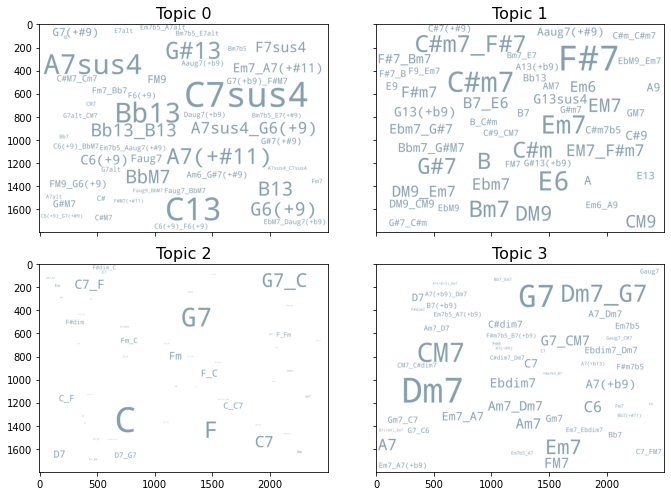

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(10,7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    #plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
#plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [29]:
from collections import Counter
topics = lda_model.show_topics(num_topics=TOTAL_TOPICS, num_words=10, formatted=False)
print(topics[0])
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([i, word , weight, counter[word]])

out

(0, [('G7(+b9)', 0.06286221), ('A7(+b9)', 0.0628539), ('CM7', 0.059531547), ('Em7b5', 0.04898908), ('G9', 0.041344374), ('D9', 0.0376099), ('Dm7b5', 0.035910025), ('Dm7', 0.033719745), ('Em7b5_A7(+b9)', 0.032053832), ('Bb9', 0.029075105)])


[[0, 'G7(+b9)', 0.06286221, 357],
 [0, 'A7(+b9)', 0.0628539, 748],
 [0, 'CM7', 0.059531547, 4977],
 [0, 'Em7b5', 0.04898908, 480],
 [0, 'G9', 0.041344374, 172],
 [0, 'D9', 0.0376099, 235],
 [0, 'Dm7b5', 0.035910025, 316],
 [0, 'Dm7', 0.033719745, 7037],
 [0, 'Em7b5_A7(+b9)', 0.032053832, 231],
 [0, 'Bb9', 0.029075105, 129],
 [1, 'CM7', 0.12773815, 4977],
 [1, 'Dm7', 0.11673628, 7037],
 [1, 'G7', 0.11108075, 9488],
 [1, 'Dm7_G7', 0.06588423, 3098],
 [1, 'A7', 0.046122216, 3208],
 [1, 'Em7', 0.040556688, 2332],
 [1, 'G7_CM7', 0.0327491, 858],
 [1, 'F7', 0.032728657, 1367],
 [1, 'G#7', 0.028038928, 744],
 [1, 'Ebm7', 0.025581367, 305],
 [2, 'Fm6', 0.13033584, 341],
 [2, 'Am11', 0.10501974, 138],
 [2, 'FM7', 0.06882973, 1688],
 [2, 'CM7', 0.051806048, 4977],
 [2, 'F7(+#11)', 0.041458484, 94],
 [2, 'Fm6_CM7', 0.0389647, 69],
 [2, 'Em7', 0.03608567, 2332],
 [2, 'C9', 0.02852575, 80],
 [2, 'FM7_Fm6', 0.02665687, 44],
 [2, 'Dm7', 0.02428806, 7037],
 [3, 'C', 0.34817487, 6298],
 [3, 'G7', 0.173

In [30]:
df = pd.DataFrame(out, columns=['topic_id', 'word',  'importance', 'word_count'])  
df     

,topic_id,word,importance,word_count
0,0,G7(+b9),0.062862,357
1,0,A7(+b9),0.062854,748
2,0,CM7,0.059532,4977
3,0,Em7b5,0.048989,480
4,0,G9,0.041344,172
...,...,...,...,...
295,29,F7sus4,0.035501,41
296,29,G#,0.032161,91
297,29,F#,0.032045,28
298,29,Em7,0.029351,2332


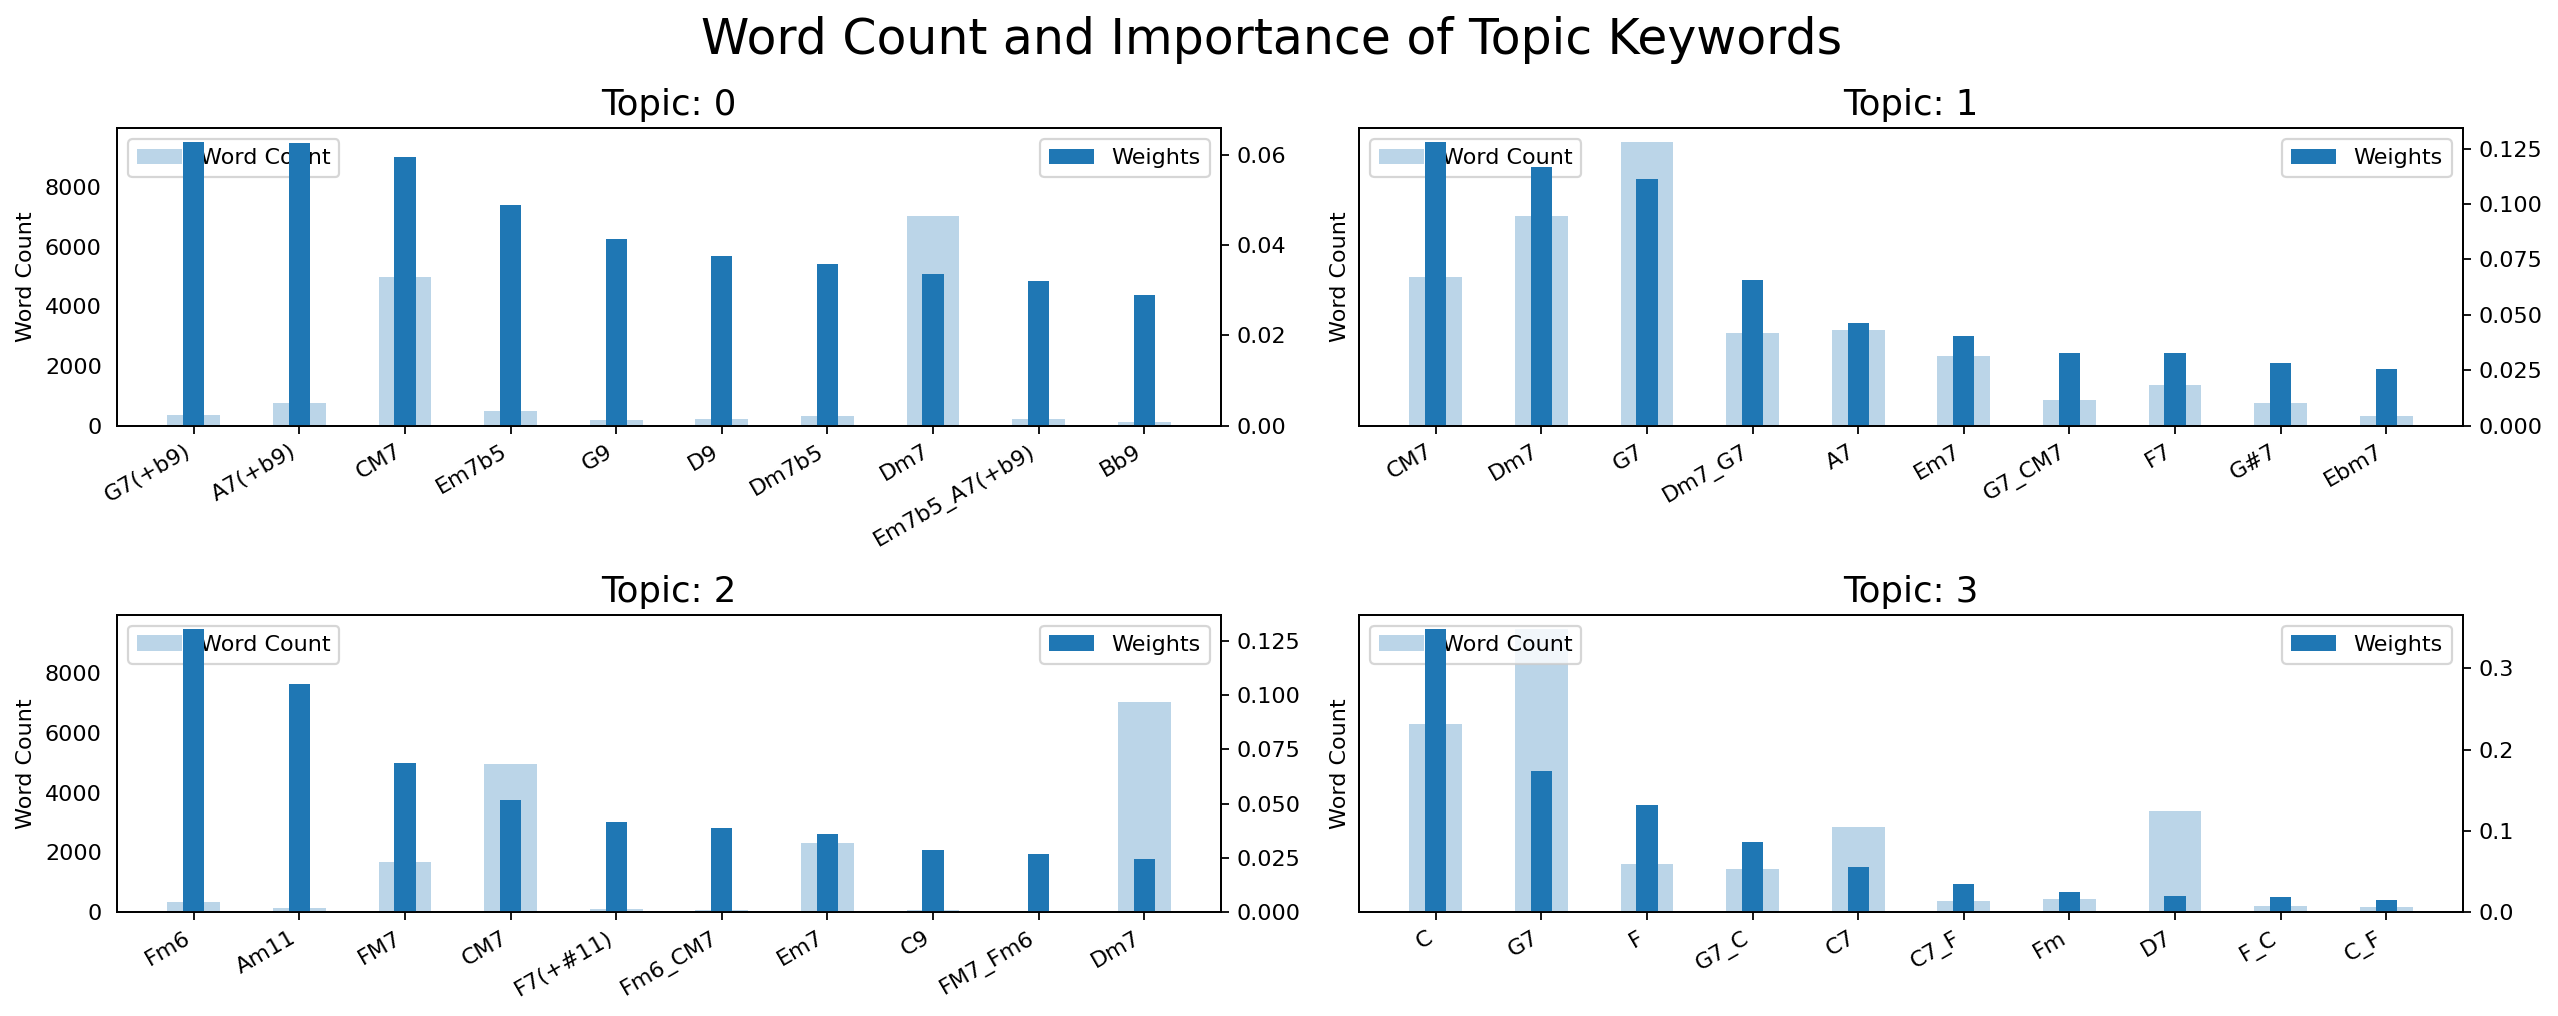

In [31]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', 
           height="word_count", 
           data=df.loc[df.topic_id==i, :], 
           #color=cols[i], 
           width=0.5, 
           alpha=0.3, 
           label='Word Count')
    
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', 
                height="importance", 
                data=df.loc[df.topic_id==i, :], 
                #color=cols[i], 
                width=0.2, 
                label='Weights')
    ax.set_ylabel('Word Count')
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    
    ax.set_title('Topic: ' + str(i), fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [32]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

2021-11-11 17:54:04,328 : INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
2021-11-11 17:54:04,361 : INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
27    -0.181887 -0.213204       1        1  19.903234
3     -0.287838  0.202361       2        1   9.739293
14    -0.340698  0.134243       3        1   9.431896
1     -0.123593 -0.191143       4        1   7.065997
11    -0.097770 -0.192718       5        1   6.462893
8     -0.234321 -0.093354       6        1   5.985196
22    -0.025312 -0.009543       7        1   5.863119
7     -0.237148 -0.008531       8        1   4.314114
0      0.053237 -0.178612       9        1   3.107172
21    -0.218715  0.217263      10        1   2.824715
20     0.179758 -0.132241      11        1   2.722066
23    -0.148777 -0.055584      12        1   2.610119
13    -0.061191 -0.056631      13        1   2.494864
17     0.091183 -0.166091      14        1   2.013202
18     0.000108  0.208694      15        1   1.916195
10     0.105217  0.067190      16        1   1.753210
28     0.024550 -0.104909      17        1   1.538825
6      0.121209 -0.094619      18        1   1.390329
2      0.064902 -0.115535      19        1   1.135759
16     0.047101  0.124051      20        1   1.120872
12     0.023695  0.090963      21        1   0.904151
24     0.157341 -0.057868      22        1   0.827758
15     0.185885  0.035916      23        1   0.749249
5     -0.010151  0.077638      24        1   0.738451
29     0.192298  0.080680      25        1   0.726392
25     0.015674 -0.011594      26        1   0.696787
26     0.186629  0.054746      27        1   0.619326
9      0.159060  0.063306      28        1   0.523095
4      0.155877  0.195889      29        1   0.415187
19     0.203677  0.129237      30        1   0.406535, topic_info=           Term         Freq        Total Category  logprob  loglift
50            C  6236.000000  6236.000000  Default  30.0000  30.0000
9            C7  2849.000000  2849.000000  Default  29.0000  29.0000
1           Am7  3465.000000  3465.000000  Default  28.0000  28.0000
59           C6  2679.000000  2679.000000  Default  27.0000  27.0000
11          CM7  4923.000000  4923.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
23         G#M7     3.384911   335.111286  Topic30  -4.8715   0.9101
100     Fm7_Bb7     2.584693   323.992355  Topic30  -5.1412   0.6741
8          C#M7     1.983869   220.917213  Topic30  -5.4058   0.7925
434          C#     1.882612    43.653129  Topic30  -5.4582   2.3616
173  Aaug7(+b9)     1.802394    14.327301  Topic30  -5.5017   3.4322

[1733 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
472      10  0.016085        A
472      13  0.080426        A
472      21  0.016085        A
472      23  0.112597        A
472      24  0.627323        A
...     ...       ...      ...
1125     10  0.159111    Gsus4
1125     13  0.159111    Gsus4
1125     27  0.159111    Gsus4
1125     28  0.477333    Gsus4
1126     28  0.837536  Gsus4_G

[3269 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 4, 15, 2, 12, 9, 23, 8, 1, 22, 21, 24, 14, 18, 19, 11, 29, 7, 3, 17, 13, 25, 16, 6, 30, 26, 27, 10, 5, 20])

## Evaluating Topic Model Quality

We can use perplexity and coherence scores as measures to evaluate the topic
model. Typically, lower the perplexity, the better the model. Similarly, the lower the
UMass score and the higher the Cv score in coherence, the better the model.


In [33]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=corpus, 
                                                      texts=data,
                                                      dictionary=id2word, 
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=corpus, 
                                                         texts=data,
                                                         dictionary=id2word, 
                                                         coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()

perplexity = lda_model.log_perplexity(corpus)

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

2021-11-11 17:54:09,417 : INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2021-11-11 17:54:09,611 : INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2021-11-11 17:54:09,798 : INFO : WordOccurrenceAccumulator accumulated stats from 2000 documents
2021-11-11 17:54:11,906 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2021-11-11 17:54:13,514 : INFO : -4.318 per-word bound, 19.9 perplexity estimate based on a held-out corpus of 1812 documents with 108673 words


Avg. Coherence Score (Cv): 0.5058948189595709
Avg. Coherence Score (UMass): -4.617713570016787
Model Perplexity: -4.317692383173977


with 50 topics

* Avg. Coherence Score (Cv): 0.4332256403506473
* Avg. Coherence Score (UMass): -4.76483490069454
* Model Perplexity: -3.5459273186336464

with 40 topics
* Avg. Coherence Score (Cv): 0.4560997038650477
* Avg. Coherence Score (UMass): -4.876745725502855
* Model Perplexity: -3.51271351366994

with 30 topics
* Avg. Coherence Score (Cv): 0.4556628442547333
* Avg. Coherence Score (UMass): -5.060449168945664
* Model Perplexity: -3.5301023252928427

with 25 topics
* Avg. Coherence Score (Cv): 0.4772412277166864
* Avg. Coherence Score (UMass): -4.360366950588141
* Model Perplexity: -3.5322672027301234

with 20 topics

* Avg. Coherence Score (Cv): 0.4560475354177811
* Avg. Coherence Score (UMass): -4.232610083553702
* Model Perplexity: -3.5478592184246818


### Dominant Topics in Tunes

In [34]:
corpus[0]
print(f"corpus[0] contains tune0; {corpus[0]}")
print(f"e.g. chord-id 2 appears 5 times -> chord id 2 = {id2word.id2token[2]}")

corpus[0] contains tune0; [(0, 1), (1, 1), (2, 5), (3, 5), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 5), (10, 1), (11, 5), (12, 1), (13, 2), (14, 2), (15, 2), (16, 1), (17, 5), (18, 6), (19, 5), (20, 4), (21, 1), (22, 1), (23, 6), (24, 7), (25, 2), (26, 4), (27, 4)]
e.g. chord-id 2 appears 5 times -> chord id 2 = B7


In [35]:
tm_results = lda_model[corpus] 

In [36]:
for topics in tm_results[:5]:
  print(topics)

([(1, 0.23655602), (11, 0.31138396), (13, 0.07648276), (16, 0.050700154), (17, 0.31701413)], [(0, [11, 13, 1]), (1, [11, 1, 17, 13]), (2, [16, 1, 13, 17, 11]), (3, [1, 17]), (4, [17]), (5, [17]), (6, [13, 1, 17, 11]), (7, [13, 1, 11]), (8, [17, 11, 1, 13]), (9, [11, 16, 1, 17, 13]), (10, [11, 17, 1]), (11, [11, 1, 17, 13]), (12, [11, 1, 13]), (13, [1, 11, 17, 13]), (14, [1, 11, 17, 13]), (15, [13, 11, 1]), (16, [13, 1]), (17, [1, 13, 17, 11]), (18, [17, 11, 1]), (19, [17, 1]), (20, [11, 17, 1]), (21, [1, 17, 11]), (22, [11, 1]), (23, [17, 11, 1, 13]), (24, [1, 11, 17, 13]), (25, [1, 11, 17, 13]), (26, [11, 17, 1, 13, 16]), (27, [11, 17, 1, 13])], [(0, [(1, 0.09979092), (11, 0.5843157), (13, 0.31581596)]), (1, [(1, 0.16775708), (11, 0.59307015), (13, 0.07426029), (17, 0.1649028)]), (2, [(1, 0.63402754), (11, 0.041157465), (13, 0.354914), (16, 3.911504), (17, 0.05837097)]), (3, [(1, 2.5830984), (17, 2.4165566)]), (4, [(17, 0.9913722)]), (5, [(17, 0.99453866)]), (6, [(1, 0.088701606), (11

In [37]:
topics = [[(term, round(wt, 3)) 
               for term, wt in lda_model.show_topic(n, topn=20)] 
                   for n in range(0, lda_model.num_topics)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['G7(+b9)', 'A7(+b9)', 'CM7', 'Em7b5', 'G9', 'D9', 'Dm7b5', 'Dm7', 'Em7b5_A7(+b9)', 'Bb9', 'F#m7b5', 'C6(+9)', 'G13', 'F9', 'Dm7_G7(+b9)', 'Em7', 'Fm6', 'A9', 'Dm7b5_G7(+b9)', 'Fm7']

Topic #2:
['CM7', 'Dm7', 'G7', 'Dm7_G7', 'A7', 'Em7', 'G7_CM7', 'F7', 'G#7', 'Ebm7', 'A7_Dm7', 'F7_Em7', 'Ebm7_G#7', 'EM7', 'Fm7', 'Bb7', 'F#m7', 'B7', 'Em7_A7', 'Am7']

Topic #3:
['Fm6', 'Am11', 'FM7', 'CM7', 'F7(+#11)', 'Fm6_CM7', 'Em7', 'C9', 'FM7_Fm6', 'Dm7', 'CM7_F7(+#11)', 'C7', 'Bb9(+#11)', 'Bbm11', 'C7_FM7', 'F#m7b5', 'C6', 'F#m7b5_Fm6', 'C9_Bb9(+#11)', 'C#7(+#11)_CM7']

Topic #4:
['C', 'G7', 'F', 'G7_C', 'C7', 'C7_F', 'Fm', 'D7', 'F_C', 'C_F', 'C_C7', 'D7_G7', 'Fm_C', 'F#dim', 'F_Fm', 'F#dim_C', 'Am', 'Em', 'E7', 'G#7']

Topic #5:
['E', 'B7', 'C7(+b9)sus4', 'B7_E', 'F#m7', 'G7(+#9)', 'Dm_Em', 'D6', 'FM7', 'E_B7', 'D', 'Em', 'E7', 'C7sus4', 'F#m7_B7', 'FM7_FmM7', 'FmM7', 'F_Fm', 'E6', 'F#7']

Topic #6:
['C7', 'A', 'Gm', 'Eb7', 'Cm', 'Bb7', 'C7_A', 'G7', 'D7', 'D', 'F7', 'Eb7_D7', 'F#M7(+

In [38]:
len(topics)

30

In [39]:
topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30
Term1,G7(+b9),CM7,Fm6,C,E,C7,G7sus4,D7,C6,C7(+#9),Am6,CM7,G,A7,C,F#7,B7,Eb7,Am,C7sus4,EbM7,Am,Am7,F7,Dm9,F6,Am9,Dm7,Cm7,Eb
Term2,A7(+b9),Dm7,Am11,G7,B7,A,Bm7,A7,G7,FM7(+#11),E7(+b9),FM7,Cm,E7,G7,C#m7,Bb7,G#M7,E7(+b9),C13,Fm7,E7,Bm7b5,C7,G#,Gm7,Am7,G7,BbM7,D
Term3,CM7,G7,FM7,F,C7(+b9)sus4,Gm,CM7,G7,G7_C6,BbM7(+#11),Bm7b5,Gm7,Am7,Em7_A7,D7,E6,C#7,Bbm7,Bm7b5,A7sus4,C#M7,C,E7(+b9),G7,CM7,Caug7,G#9(+#11),CM7,F7,G
Term4,Em7b5,Dm7_G7,CM7,G7_C,B7_E,Eb7,Am7,A7_D7,Dm7,G#M7(+#11),Bm7b5_E7(+b9),C7,CM7(+#11),Em7,A7,Em7,B7_Bb7,Bbm7_Eb7,E7,Bb13,CM7,G7,Dm7,C7_F7,G9sus4,C7_F6,F9,Dm7_G7,Cm7_F7,Bb
Term5,G9,A7,F7(+#11),C7,F#m7,Cm,G7sus4_CM7,E7,D7,C#7(+#9),Dm6,Bb7,Em7,F#m7,G7_C,C#m7_F#7,Bm,Dm7b5,Bm7b5_E7(+b9),G#13,C#m7,E7_Am,Bm7b5_E7(+b9),Dm7,FmM7,C7,C#m7,Em7,CM7,C#
Term6,D9,Em7,Fm6_CM7,C7_F,G7(+#9),Bb7,Am7_Bm7,D7_G7,A7,F#M7(+#11),D13,Gm7_C7,FM7,Dm7,Dm7,Bm7,C7,G7(+b9),E7(+b9)_Am,A7(+#11),BM7,Em,E7,A7,BbM7,Dm7,Dm9,A7,D7,F7sus4
Term7,Dm7b5,G7_CM7,Em7,Fm,Dm_Em,C7_A,D7sus4,CM7,F6,B7alt,Am(+b6),Fm7,D7_G,Bm7,Dm,B,A7,Dm7,Dm,B13,G#M7,Dm,Am7_D7,Bb7,AM7,Gm7_C7,Eb7_D7,C6,Eb7,G#
Term8,Dm7,F7,C9,D7,D6,G7,Em7,G#7,Am7,C7(+#9)_C#7(+#9),Dm7,Dm7,C,Bm7_E7,D7_G7,C#m,F#7(+#9),FM7,Am_Bm7b5,BbM7,DM7,Dm7,FM7,Dm7_G7,G7(+b9),C7sus4,G#M7(+#11),Am7,G7,F#
Term9,Em7b5_A7(+b9),G#7,FM7_Fm6,F_C,FM7,D7,E7(+#9),E7_A7,C7,CM7,A7(+b9),G7,F,F#m7_B7,Dm7_G7,G#7,C#7sus4,CM7,F7,G6(+9),F#m7,G,D7,F#dim7,B7(+#11),FM7,Eb7,FM7,Dm7,Em7
Term10,Bb9,Ebm7,Dm7,C_F,E_B7,D,E7(+#9)_Am7,Bb7(+#11),Dm7_G7,G#M7,AM7,D7,F_G,G7,Gaug,DM9,G#7sus4,C7(+b9),Am_E7,Bb13_B13,Cm7,D7,F#m7b5,G13,Fm9,Eb9sus4,D13,G7_CM7,G#7,G#m7


In [40]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['TermsPerTopic'],
                         index=['Topic'+str(t) for t in range(1, lda_model.num_topics+1)]
                         )
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,TermsPerTopic
Topic1,"G7(+b9), A7(+b9), CM7, Em7b5, G9, D9, Dm7b5, Dm7, Em7b5_A7(+b9), Bb9, F#m7b5, C6(+9), G13, F9, Dm7_G7(+b9), Em7, Fm6, A9, Dm7b5_G7(+b9), Fm7"
Topic2,"CM7, Dm7, G7, Dm7_G7, A7, Em7, G7_CM7, F7, G#7, Ebm7, A7_Dm7, F7_Em7, Ebm7_G#7, EM7, Fm7, Bb7, F#m7, B7, Em7_A7, Am7"
Topic3,"Fm6, Am11, FM7, CM7, F7(+#11), Fm6_CM7, Em7, C9, FM7_Fm6, Dm7, CM7_F7(+#11), C7, Bb9(+#11), Bbm11, C7_FM7, F#m7b5, C6, F#m7b5_Fm6, C9_Bb9(+#11), C#7(+#11)_CM7"
Topic4,"C, G7, F, G7_C, C7, C7_F, Fm, D7, F_C, C_F, C_C7, D7_G7, Fm_C, F#dim, F_Fm, F#dim_C, Am, Em, E7, G#7"
Topic5,"E, B7, C7(+b9)sus4, B7_E, F#m7, G7(+#9), Dm_Em, D6, FM7, E_B7, D, Em, E7, C7sus4, F#m7_B7, FM7_FmM7, FmM7, F_Fm, E6, F#7"
Topic6,"C7, A, Gm, Eb7, Cm, Bb7, C7_A, G7, D7, D, F7, Eb7_D7, F#M7(+#11), BbM7, A7(+b9)_Dm6, Am6_Em7b5, C9, E7, B7(+b9), Em7b5"
Topic7,"G7sus4, Bm7, CM7, Am7, G7sus4_CM7, Am7_Bm7, D7sus4, Em7, E7(+#9), E7(+#9)_Am7, D9, F#m7b5, Dm7, E7(+#11), C6(+9), Am7_D7sus4, A13, DM7, EM7(+#11), G#M7"
Topic8,"D7, A7, G7, A7_D7, E7, D7_G7, CM7, G#7, E7_A7, Bb7(+#11), Bb7, C7, Eb7, Bb7_A7, G7_CM7, C6, F7_E7, Caug, Eb7_D7, G7(+#11)"
Topic9,"C6, G7, G7_C6, Dm7, D7, A7, F6, Am7, C7, Dm7_G7, F#dim7, Am7_Dm7, A7_Dm7, D7_G7, G#7, Am7_D7, E7, C7_F6, Cdim7, Gm7"
Topic10,"C7(+#9), FM7(+#11), BbM7(+#11), G#M7(+#11), C#7(+#9), F#M7(+#11), B7alt, C7(+#9)_C#7(+#9), CM7, G#M7, Csus4, Bb, F7, G, F#7(+b9), C#7(+#9)_C7(+#9), Gsus4, Eb, Dm7, C(+9)"


In [41]:
for topics in tm_results[:5]:
  print(topics)

([(1, 0.23658776), (11, 0.31135562), (13, 0.07648231), (16, 0.05069848), (17, 0.31701288)], [(0, [11, 13, 1]), (1, [11, 1, 17, 13]), (2, [16, 1, 13, 17, 11]), (3, [1, 17]), (4, [17]), (5, [17]), (6, [13, 1, 17, 11]), (7, [13, 1, 11]), (8, [17, 11, 1, 13]), (9, [11, 16, 1, 17, 13]), (10, [11, 17, 1]), (11, [11, 1, 17, 13]), (12, [11, 1, 13]), (13, [1, 11, 17, 13]), (14, [1, 11, 17, 13]), (15, [13, 11, 1]), (16, [13, 1]), (17, [1, 13, 17, 11]), (18, [17, 11, 1]), (19, [17, 1]), (20, [11, 17, 1]), (21, [1, 17, 11]), (22, [11, 1]), (23, [17, 11, 1, 13]), (24, [1, 11, 17, 13]), (25, [1, 11, 17, 13]), (26, [11, 17, 1, 13, 16]), (27, [11, 17, 1, 13])], [(0, [(1, 0.0998089), (11, 0.58428645), (13, 0.3158273)]), (1, [(1, 0.16778572), (11, 0.5930348), (13, 0.07426226), (17, 0.16490762)]), (2, [(1, 0.6341231), (11, 0.04115419), (13, 0.35491633), (16, 3.9114094), (17, 0.05837151)]), (3, [(1, 2.583275), (17, 2.41638)]), (4, [(17, 0.9913711)]), (5, [(17, 0.9945379)]), (6, [(1, 0.08871352), (11, 0.03

In [42]:
corpus_topics = [sorted(topics[0], key=lambda record: -record[1])[0] for topics in tm_results]
#corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

corpus_topics[:10]



[(17, 0.31700912),
 (20, 0.6351605),
 (24, 0.36522442),
 (3, 0.5433172),
 (23, 0.77189314),
 (24, 0.43206665),
 (11, 0.42915586),
 (27, 0.3415076),
 (27, 0.5368527),
 (22, 0.34029)]

In [43]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(data))
corpus_topic_df['DominantTopic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution%'] = [round(item[1]*100, 2) for item in corpus_topics]
#corpus_topic_df['TopicDesc'] = [topics_df.iloc[t[0]]['TermsPerTopic'] for t in corpus_topics]
corpus_topic_df['Tunes'] = data

In [44]:
corpus_topic_df['Title'] = titles['title']

In [45]:
corpus_topic_df

,Document,DominantTopic,Contribution%,Tunes,Title
0,0,18,31.70,"[CM7, Eb7, G#M7, B7, EM7, G7, Gm7, C7, FM7, G#7, C#M7, E7, Am7, D7, Dm7, G7, CM7, Eb7, G#M7, B7, EM7, G7, Gm7, C7, FM7, Eb7, G#M7, B7, EM7, G7, CM7, Gm7, C7, Bm7, E7, AM7, C7, FM7, Bbm7, Eb7, G#M7, Dm7, G7, CM7, Eb7, G#M7, B7, EM7, G7, Gm7, C7, FM7, Eb7, G#M7, B7, EM7, G7, CM7, Eb7_G#M7, B7_EM7, Gm7_C7, G#7_C#M7, E7_Am7, Dm7_G7, Eb7_G#M7, B7_EM7, Gm7_C7, Eb7_G#M7, B7_EM7, G7_CM7, Gm7_C7, Bm7_E7, C7_FM7, Bbm7_Eb7, Dm7_G7, Eb7_G#M7, B7_EM7, Gm7_C7, Eb7_G#M7, B7_EM7, G7_CM7]",26-2
1,1,21,63.52,"[Am7, Am7, Cm7, Cm7, EbM7, EbM7, Em7b5, A7(+#9), Dm7, Dm7, Bm7b5, Bm7b5, Bbm7, Bbm7, Fm7, Fm7, E7(+#9), E7(+#9), Fm7, Fm7, C#M7, C#M7, Fm7, Fm7, C#M7, C#M7, Em7b5_A7(+#9)]",500 Miles High
2,2,25,36.52,"[Am7, C#M7, Bm7b5, E7(+#9), Am7, C#M7, Bm7b5, E7(+#9), Cm7, F7(+b9), BbM7, G#m7, C#7, F#m7b5, B7(+b9), EaugM7, EaugM7, E7, Am7, C#M7, Bm7b5, E7(+#9), Am7, C#M7, Bm7b5, E7(+#9), Cm7, F7(+b9), BbM7, G#m7, C#7, F#m7b5, B7(+b9), Em7, Em7, Bm7b5_E7(+#9), Bm7b5_E7(+#9), Cm7_F7(+b9), G#m7_C#7, F#m7b5_B7(+b9), EaugM7_E7, Bm7b5_E7(+#9), Bm7b5_E7(+#9), Cm7_F7(+b9), G#m7_C#7, F#m7b5_B7(+b9)]",502 Blues
3,3,4,54.33,"[C, Am7, Dm7, G7, C, Am7, Dm7, G7, C, Am7, Dm7, G7, C, G7, C, C, Am7, Dm7, G7, C, Am7, Dm7, G7, C, Am7, Dm7, G7, C, G7, C, C7, C7, F6, F6, D7, D7, G7, G7, C, Am7, Dm7, G7, C, Am7, Dm7, G7, C, Am7, Dm7, G7, C, G7, C, Am7_Dm7, G7_C, Am7_Dm7, G7_C, Am7_Dm7, G7_C, G7_C, Am7_Dm7, G7_C, Am7_Dm7, G7_C, Am7_Dm7, G7_C, G7_C, C7_F6, D7_G7, Am7_Dm7, G7_C, Am7_Dm7, G7_C, Am7_Dm7, G7_C, G7_C]",52nd Street Theme
4,4,24,77.19,"[C9, Ebm6, C9, Ebm6, Bb, Bb7, A7, G#7, G7, C9, F#dim7, C9, G#7, G7, C9, Ebm6, C9, Ebm6, Bb, Bb7, A7, G#7, G7, C9, F#dim7, C9, F7, Bb, Bb, Eb, Eb6, Eb6, Eb6, G9, F, F6, F9, F7, C9, Ebm6, C9, Ebm6, Bb, Bb7, A7, G#7, G7, C9, F#dim7, C6, F7, Bb, D9, C9_Ebm6, C9_Ebm6, Bb7_A7, C9_F#dim7, C9_Ebm6, C9_Ebm6, Bb7_A7, C9_F#dim7, F7_Bb, Eb_Eb6, C9_Ebm6, C9_Ebm6, Bb7_A7, C9_F#dim7, F7_Bb]",9.20 Special
...,...,...,...,...,...
1807,1807,15,73.13,"[C, C, C#dim, G7, G7, G7, G7, C, C#dim, G7, Dm7, G7, C, C, C#dim, G7, G7, G7, G7, C, Dm7, C, E, F, FM7, F#dim, C, C, B7, B7, Em, B7, Dm7, G7, C, C, C#dim, G7, G7, G7, G7, C, Ebdim, G7, Dm7, G7, C_C#dim, G7_C, Dm7_G7, C_C#dim, G7_C, F#dim_C, B7_Em, Dm7_G7, C_C#dim, G7_C, Dm7_G7]",You're Foolin' Someone
1808,1808,15,48.66,"[Dm7, G7, Em7b5, A7, Dm7, G#7, G7, C, C, Dm7, G7, Em7b5, A7, Dm7, G#7, G7, C, C, A7, A7, A7, A7, Dm7, G7(+b9), D7, G7, Dm7, G7, Em7b5, A7, Dm7, G#7, G7, C, C, Dm7_G7, Em7b5_A7, G7_C, Dm7_G7, Em7b5_A7, G7_C, A7_Dm7, D7_G7, Dm7_G7, Em7b5_A7, G7_C]",You're Lucky To Me
1809,1809,15,87.54,"[C, E7, A7, A7, Dm, G7, C, Em7, C, G7, Em7, Cdim, Dm7, Dm7, Dm7, D7, Dm7, G7, Dm7, G7, C, E7, A7, A7, Dm, A7, Dm, A7, Dm, F, Cdim, C, E7, Dm, D7, G7, C, C, E7_A7, G7_C, Dm7_G7, Dm7_G7, E7_A7, A7_Dm, A7_Dm, Cdim_C, D7_G7]",You're Nobody Till Somebody Loves You
1810,1810,4,73.36,"[G7, G7, C, C, G7, G7, C, F, G#, C, C, G7, G7, C, F, C, C, G7, C, G7, F7, F7, F7, C, F7, F7, C, C, F7, F7, F7, C, F7, F7, C, F, C, G7_C, G7_C, G7_C, F_C, G7_C, C_F]",Your Feet's Too Big


In [46]:
corpus_topic_df.groupby('DominantTopic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution%'], 
                                                                                         ascending=False)
                                                                             .iloc[0])
)


,Document,DominantTopic,Contribution%,Tunes,Title
DominantTopic,,,,,
1,97,1,83.42,"[C6(+9), A7(+b9), Dm9, G7(+b9), Am, Am, D7, Fm6, CM7, D9, Dm7, G13, Bb9, A7, D9, Gaug7, C6(+9), A7(+b9), Dm9, G7(+b9), Am, Am, D7, Fm6, CM7, D9, Bb9, Aaug7, D9, Gaug7, C6, F#m7b5, B7, EM7, F9, EM7, F9, EM7, F9, EM7, Am7, D7, GM7, G#9, GM7, G#9, GM7, Eb7, D7, Dm9, Gaug7, C6(+9), A7(+b9), Dm9, G7(+b9), Am, Am, F#m7b5, Fm6, Em7, Aaug7, D9, Gaug7, C6(+9), C#7, Dm7, C#7, Em7, Eb7, G#M7, C#9, C6(+9), C6(+9), Dm9_G7(+b9), Fm6_CM7, G13_Bb9, A7_D9, Gaug7_C6(+9), Dm9_G7(+b9), Fm6_CM7, Aaug7_D9, Gaug7_C6, F#m7b5_B7, EM7_F9, EM7_F9, EM7_F9, Am7_D7, GM7_G#9, GM7_G#9, Eb7_D7, Dm9_Gaug7, Dm9_G7(+b9), Am_F#m7b5, Fm6_Em7, Aaug7_D9, Gaug7_C6(+9), Em7_Eb7, G#M7_C#9]",Autumn Nocturne
2,935,2,98.92,"[CM7, Dm7, G7, Em11, A7, Dm7, G7, CM7, Dm7, G7, CM7, Dm7, G7, CM7, Dm7, G7, Em11, A7, Dm7, G7, CM7, Dm7, G7, CM7, F#m7, B7, EM7, F#m7, B7, EM7, Em7, A7, DM7, Am7, D7, Dm7, G7(+b5), CM7, Dm7, G7, Em11, A7, Dm7, G7, CM7, Dm7, G7, CM7, Dm7, G7, Dm7_G7, A7_Dm7, G7_CM7, Dm7_G7, Dm7_G7, Dm7_G7, A7_Dm7, G7_CM7, Dm7_G7, F#m7_B7, EM7_F#m7, B7_EM7, Em7_A7, Am7_D7, Dm7_G7, A7_Dm7, G7_CM7, Dm7_G7, Dm7_G7]",Parisian Thoroughfare
3,588,3,97.69,"[Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Bbm11, Bbm11, Bbm11, Bbm11, Bbm11, Bbm11, Bbm11, Bbm11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11, Am11_Bbm11]",Impressions
4,1680,4,99.39,"[C, G7, C, G7, C, Cdim, G7, C, G7, C, G7, C, G7, C, C7, F, C7, F, C7, F, C7, F, G7, G7, C, F, C, C, G7, C, G7, C, G7, C, C7, F, C7, F, C7, F, C7, F, G7, G7, C, F, C, C, C, C, C, F, F, C, C, G7, G7, C, F, C, C, G7, C, G7, C, G7, C, C7, F, C7, F, C7, F, C7, F, G7, G7, C, F, C, C7, C7, Cdim, C7, G7_C, G7_C, G7_C, G7_C, G7_C, G7_C, C7_F, C7_F, C7_F, C7_F, G7_C, F_C, G7_C, G7_C, G7_C, C7_F, ...]",Royal Garden Blues
5,595,5,98.25,"[C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, F#7, G7(+#9), Cm7, Cm7, F#7, G7(+#9), G#7, G7(+#9), C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4, C7(+b9)sus4_F#7, G7(+#9)_Cm7, F#7_G7(+#9), G#7_G7(+#9)]","In The Cool, Cool, Cool Of The Evening"
6,1047,6,78.11,"[C7, C7, C7, C7, C7, C7, C7, C7, C7, C7, C7, C7, C7, C7, C7, C7, F7, F7, C7, C7, F7, Eb7, D7, C#7, C7, C7, C7, C7, C7, C7, C7, C7, C7_F7, C7_F7, Eb7_D7]",Sister Sadie
7,464,7,93.74,"[Am, Am7, D7sus4, D9, GM7, CM9, F#m7b5, Baug7(+b9), Em7, Em7, Am, Am7, D7sus4, D9, GM7, CM9, F#m7b5, Baug7(+b9), EM7, EM7, CM7, F#m7b5, EM7, E7, CM7, F#m7b5, E7sus4, E7sus4, Am, Am7, D7sus4, D9, GM7, CM9, F#m7b5, Baug7(+b9), Em7, Em7, CM7, D9, Ebdim7, Em7, Am7, D7sus4, D9, Em7, Em7, CM7, D9, Ebdim7, Dm7, C#7(+b5), CM7, D9, Ebdim7, Em7, Am7, D7sus4, Em9, Em9, Am7_D7sus4, GM7_CM9, F#m7b5_Baug7(+b9), Am7_D7sus4, GM7_CM9, F#m7b5_Baug7(+b9), Am7_D7sus4, GM7_CM9, F#m7b5_Baug7(+b9), Am7_D7sus4, Ebdim7_Dm7, C#7(+b5)_CM7, Am7_D7sus4]",Here's To Life
8,1746,8,83.56,"[A7, A7, A7, A7, D7, D7, D7, D7, E7, E7, A7, A7, D7, D7, G7, G7, A7, A7, A7, A7, D7, D7, D7, D7, E7, E7, A7, A7, D7, G7, C, A7, D7, G7, C, C, G#7, A7_D7, E7_A7, D7_G7, A7_D7, E7_A7, D7_G7, A7_D7, G7_C]",There'll Be Some Changes Made
9,22,9,99.00,"[F#dim7, F6, C6, C6, F#dim7, F6, C6, C6, F#dim7, F6, C6, C6, D7, G7, C6, F#dim7, F6, C6, C6, F#dim7, F6, C6, C6, F#dim7, F6, C6, C6, D7, G7, C6, C7, F6, F#dim7, C6, Gm7, C7, F6, F#dim7, C6, A7(+b9), Dm7b5, G7, F#dim7, F6, C6, C6, F#dim7, F6, C6, C6, F#dim7, F6, C6, C6, D7, G7, C6, F#dim7_F6, F#dim7_F6, F#dim7_F6, D7_G7, F#dim7_F6, F#dim7_F6, F#dim7_F6, D7_G7, C7_F6, F#dim7_C6, Gm7_C7, F6_F#dim7, A7(+b9)_Dm7b5, F#dim7_F6, F#dim7_F6, F#dim7_F6, D7_G7]",A Smooth One


In [47]:
corpus_topic_df.value_counts('DominantTopic')

DominantTopic
28    417
4     240
15    208
2     141
12    102
9     101
23    96 
24    57 
8     53 
21    44 
19    41 
22    37 
1     35 
11    34 
14    32 
18    26 
3     17 
7     16 
13    16 
25    15 
6     15 
29    15 
27    12 
26    9  
30    7  
10    7  
5     7  
20    6  
16    5  
17    1  
dtype: int64

### List the Tunes of the individual Topics

In [48]:
def display_tunes_per_topic(df, topic):
  tunes = df.query(f"DominantTopic == {topic}").sort_values('Contribution%', ascending=False)
  print(f"\n*** TOPIC {n} ***")
  print(f"{len(tunes)} tunes")
  return tunes


In [49]:
topic_result = corpus_topic_df.loc[:, ['DominantTopic', 'Contribution%', 'Title', 'Tunes']]

In [50]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [51]:
for n in range(1, TOTAL_TOPICS+1):
  print(display_tunes_per_topic(topic_result, topic=n).head(30))


*** TOPIC 1 ***
35 tunes
      DominantTopic  Contribution%                            Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Tunes
97    1              83.42          Autumn Nocturne                  [C6(+9), A7(+b9), Dm9, G7(+b9), Am, Am, D7, Fm6, CM7, D9, Dm7, G13, Bb

In [52]:
from gensim.matutils import jaccard

In [53]:
# element 0 of the result from lda_model contains the topics that a tune belongs to, with the respective probabilities
jaccard(lda_model[corpus[505]][0], lda_model[corpus[925]][0])

0.961400560723553

In [54]:
topic_result.loc[:, ['DominantTopic']].to_csv('topics.csv', index=True, index_label='id')

In [55]:
from google.colab import files
files.download("topics.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>